In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import re
%matplotlib inline

In [2]:
movies = pd.read_csv("Movie_Movies.csv")
gen = pd.read_csv("Movie_Genres.csv")
writers = pd.read_csv("Movie_Writer.csv")
ratings = pd.read_csv("Movie_AdditionalRating.csv")
actors = pd.read_csv("Movie_Actors.csv")
#movies.head()
#movies.describe()
#movies.info()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Checking missing values 

In [3]:
dataAll = {"movies": movies, "gen": gen, "writers": writers, "ratings" : ratings, "actors": actors}
def CheckNAs():
    for key in dataAll:
        if dataAll[key].isnull().values.any() == True:
            print(key)
        else:
            return;
CheckNAs()

movies


In [4]:
movies.isnull().sum()

Awards        158347
Country        12689
DVD           162738
Director       27334
Language       25491
Plot           81211
Poster        130273
Production    162241
Rated         154781
Released       61713
Runtime        59190
Title              1
Type               1
Website       171940
Year               1
imdbID             1
imdbRating    116614
imdbVotes     116658
dtype: int64

In [5]:
movies.drop(["Awards", "DVD", "Plot", "Poster", "Production","Rated", "Released", "Website"], axis = 1, inplace = True)

In [6]:
movies["Type"].value_counts()

movie     178665
series        21
Name: Type, dtype: int64

In [7]:
movies = movies[movies["Type"] == "movie"].reset_index(drop=True)
movies.drop(["Type"], axis = 1, inplace =True) 

#### transfer Runtime into mins (float) and convert data type

In [8]:
movies.Runtime= movies.Runtime.str.replace(" min", "")
#movies.Runtime.str.endswith("h").value_counts()
endWithH = movies.Runtime.str.endswith("h")
movies.Runtime[endWithH == True] = movies.Runtime[endWithH == True].str.replace("h", "*60")
movies.Runtime = movies.Runtime.str.replace("h", "*60 +")
movies.Runtime = movies.Runtime.str.replace("mi", "")
movies.Runtime = movies.Runtime.str.replace("," , "")
movies.Runtime.dropna(inplace = True)
movies.Runtime = movies.Runtime.apply(lambda x: eval(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
#movies[movies.Runtime == max(movies.Runtime)]

,Country,Director,Language,Runtime,Title,Year,imdbID,imdbRating,imdbVotes
43761,"Finland, Denmark, Vietnam","Bjornstjerne Reuter Christiansen, Jakob Fenger...",NaN,14400.0,Modern Times Forever,2011,tt2659636,6.8,49


In [13]:
movies.imdbVotes = movies.imdbVotes.str.replace(",", "").astype(float)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


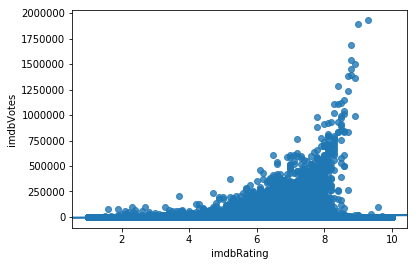

In [14]:
sns.regplot(data= movies, x = "imdbRating", y =  "imdbVotes")
#No correlation between Rating and Votes, However, top Votes indicates high ratings, while high rating is not necessarily top votes.

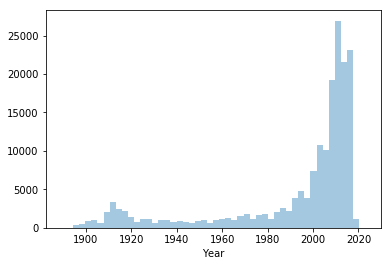

In [15]:
movies.Year = movies.Year.astype(int)
sns.distplot(movies["Year"], kde=False)
#film production grew up since 80s

In [16]:
movies.Language.value_counts().sort_values
#Compared to Linguistic perspect

<bound method Series.sort_values of English                                                                                               117792
French                                                                                                  4051
Japanese                                                                                                2939
German                                                                                                  2628
Spanish                                                                                                 2320
Italian                                                                                                 2169
Korean                                                                                                  1090
Mandarin                                                                                                 792
Hindi                                                                                       

In [17]:
#USA produced about 60% of films 
moviesPerCountry = pd.DataFrame(movies.Country.value_counts())
usaSum = moviesPerCountry[moviesPerCountry.index.str.contains("USA")]["Country"].sum()
usaPerc = usaSum/moviesPerCountry["Country"].sum()
usaPerc

0.5976912463775101

In [18]:
toptenCountry = movies['Country'].value_counts().sort_values().nlargest(10)
totalSum = movies["Country"].value_counts().sum()
other = pd.Series(totalSum-(toptenCountry.sum()), index= ["other"])
filmperCountry = toptenCountry.append(other)

In [19]:
filmperCountry

USA          93419
UK           16257
Canada        6884
France        4360
Australia     3516
Japan         3194
Germany       2489
Italy         2286
India         1773
Spain         1134
other        30665
dtype: int64

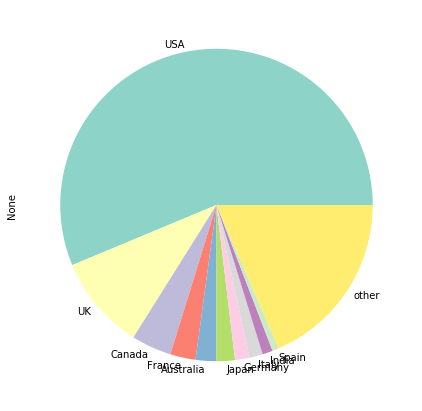

In [20]:
cmap = plt.cm.Set3
colors = cmap(np.linspace(0., 1., 11))
plt.figure(figsize=(7,10))
filmperCountry.plot.pie(colors=colors,labeldistance=1.05)

In [21]:
#gen["Genre"].unique()
gen["Genre"]= gen["Genre"].str.strip()

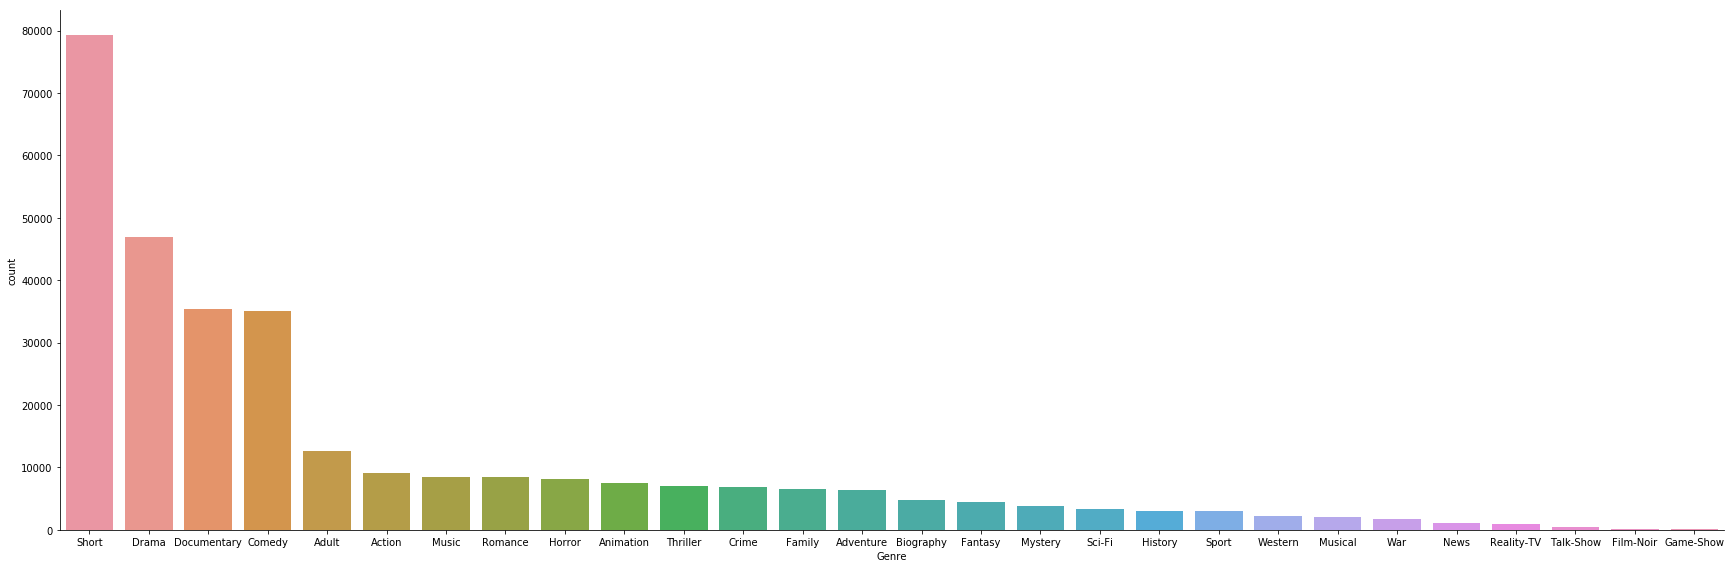

In [22]:
sns.catplot(data = gen, x="Genre", kind="count",height=8, aspect = 3, order = gen['Genre'].value_counts().index) 

In [23]:
#ratings["RatingSource"].unique()
ratings["RatingSource"] = ratings["RatingSource"].str.strip()

#### convert all ratings in the same units

In [1]:
a = ratings[ratings["RatingSource"] == "Internet Movie Database"]
a["Rating"] = a["Rating"].str.replace("/10","").astype(float)
a["Rating"] = 10 * a["Rating"]
b = ratings[ratings["RatingSource"] == "Rotten Tomatoes"]
b["Rating"] = b["Rating"].str.replace("%","").astype(float)
c = ratings[ratings["RatingSource"] == "Metacritic"]
c["Rating"] = c["Rating"].str.replace("/100", "").astype(float)
ratingsNew=pd.concat([a,b,c], axis=0).sort_index()

NameError: name 'ratings' is not defined

In [26]:
ratingsNew = round(ratingsNew[["Rating","imdbID"]].groupby(["imdbID"]).mean())

In [27]:
filmandRate = pd.merge(movies, ratingsNew, on = 'imdbID')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


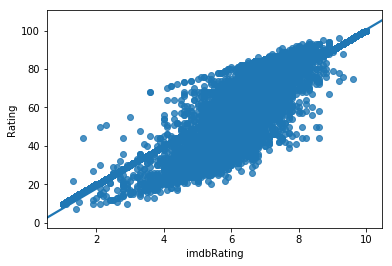

In [28]:
sns.regplot(data= filmandRate, x = "imdbRating", y =  "Rating")

#### drop rating and imdbRating columns, add avgRating columns. 

In [29]:
filmandRate["avgRating"] = (filmandRate["Rating"] + filmandRate["imdbRating"]*10)/2
filmandRate.drop(["Rating", "imdbRating"], axis = 1, inplace=True)

In [30]:
film_R_G = pd.merge(gen, filmandRate, on = 'imdbID')

In [31]:
film_R_G["avgRating"].groupby(film_R_G["Genre"]).mean().sort_values(ascending = False)

Genre
Music          71.494287
Biography      70.255758
Documentary    69.957917
History        69.726757
Film-Noir      68.148387
News           67.904639
Talk-Show      67.755556
Sport          67.603641
Short          67.273750
War            65.730151
Animation      65.482652
Adult          64.578820
Musical        64.573469
Game-Show      64.500000
Drama          64.240043
Family         63.019096
Reality-TV     62.284848
Comedy         62.063698
Romance        61.935513
Crime          60.691250
Adventure      60.688563
Fantasy        60.402494
Western        60.398796
Mystery        60.131934
Action         57.969419
Thriller       56.980331
Sci-Fi         56.030444
Horror         53.136099
Name: avgRating, dtype: float64

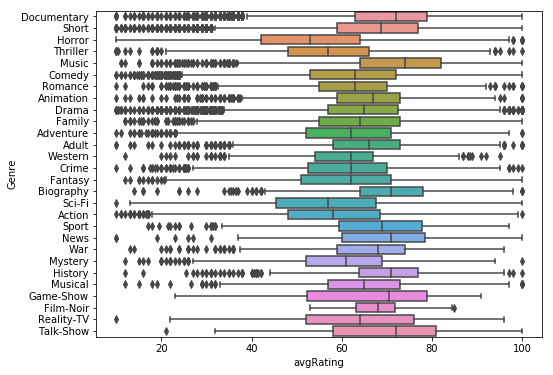

In [32]:
plt.figure(figsize = (8,6))
sns.boxplot(data = film_R_G, x = "avgRating", y = "Genre", orient="h")

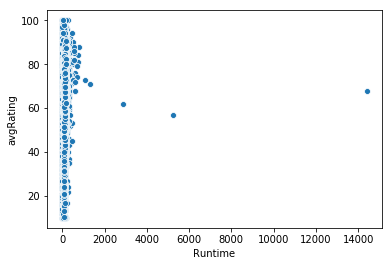

In [33]:
sns.scatterplot(data= filmandRate, x = "Runtime", y =  "avgRating")

In [34]:
#Drop outliers based on Runtime
toDropruntime = filmandRate.sort_values("Runtime", ascending = False)[:4].index
filmandRate.drop(toDropruntime, inplace = True)

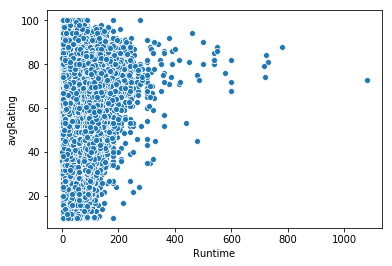

In [35]:
sns.scatterplot(data= filmandRate, x = "Runtime", y =  "avgRating")
#Rating doesn't have much to do with Runtime, however, seems people who watch extremely long films tended to rate higher

In [37]:
film_R_G["Time"] = np.where(film_R_G["Year"]>=1980, "After80s", "Before80s") 

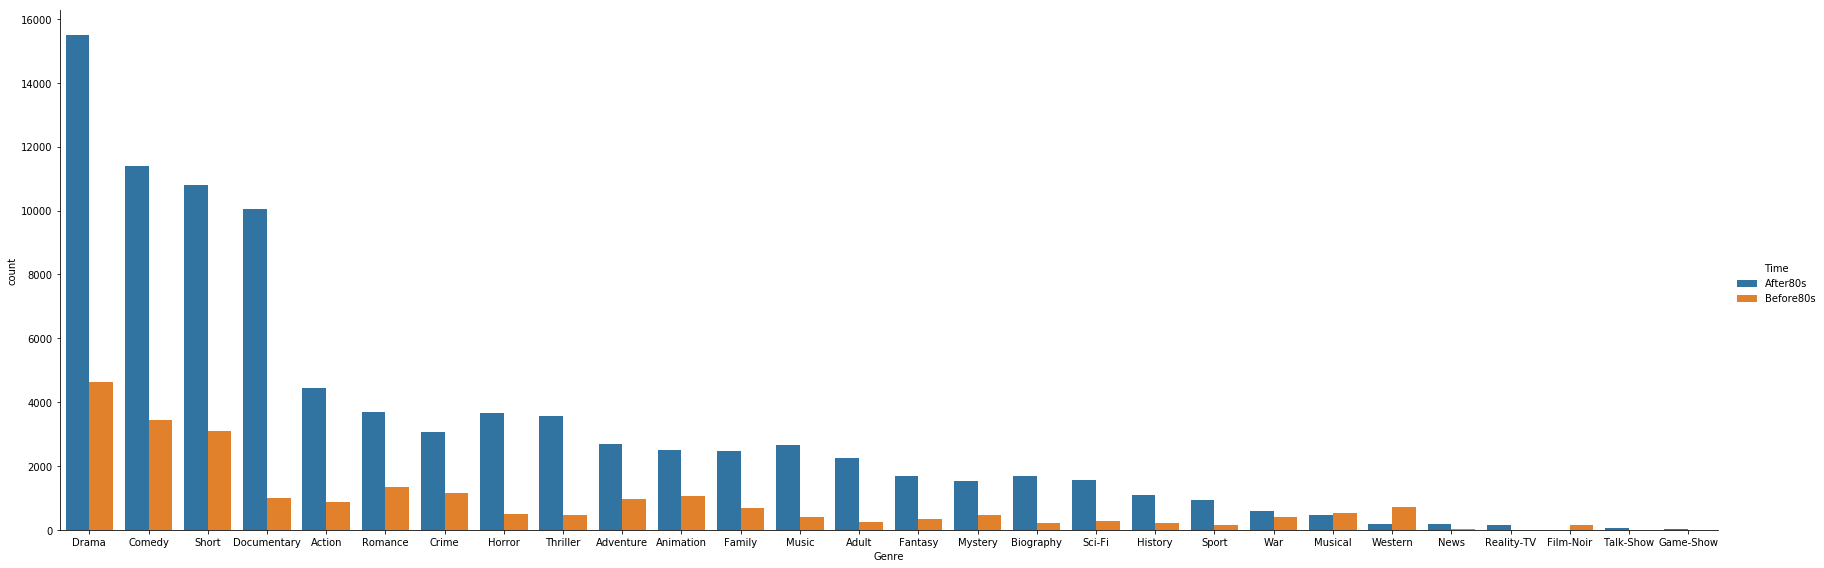

In [38]:
sns.catplot(data = film_R_G, x="Genre", kind="count",
            height=8, aspect = 3, order =film_R_G['Genre'].value_counts().index,
           hue = "Time") 

In [40]:
film_R_G["produced_in"] = np.where(film_R_G["Country"]=="USA", "USA", "Others") 

In [41]:
film_year_country = film_R_G.groupby(["Year", "produced_in"]).count().reset_index()

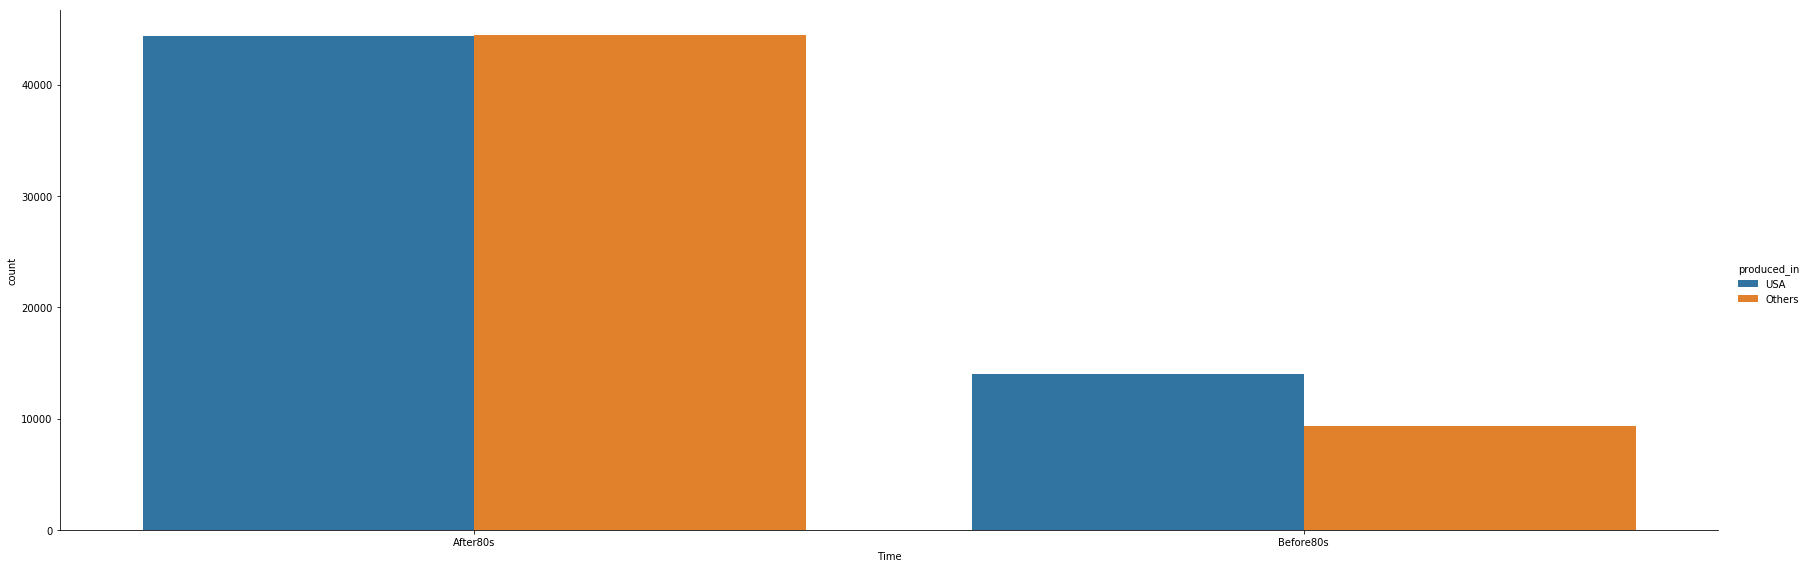

In [42]:
sns.catplot(data = film_R_G, x="Time", kind="count",
            height=8, aspect = 3,
           hue = "produced_in") 

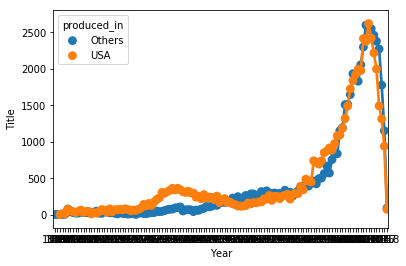

In [43]:
film_year_country = film_year_country[["Year", "produced_in", "Title"]]
sns.pointplot(x="Year", y="Title", hue="produced_in", data=film_year_country)

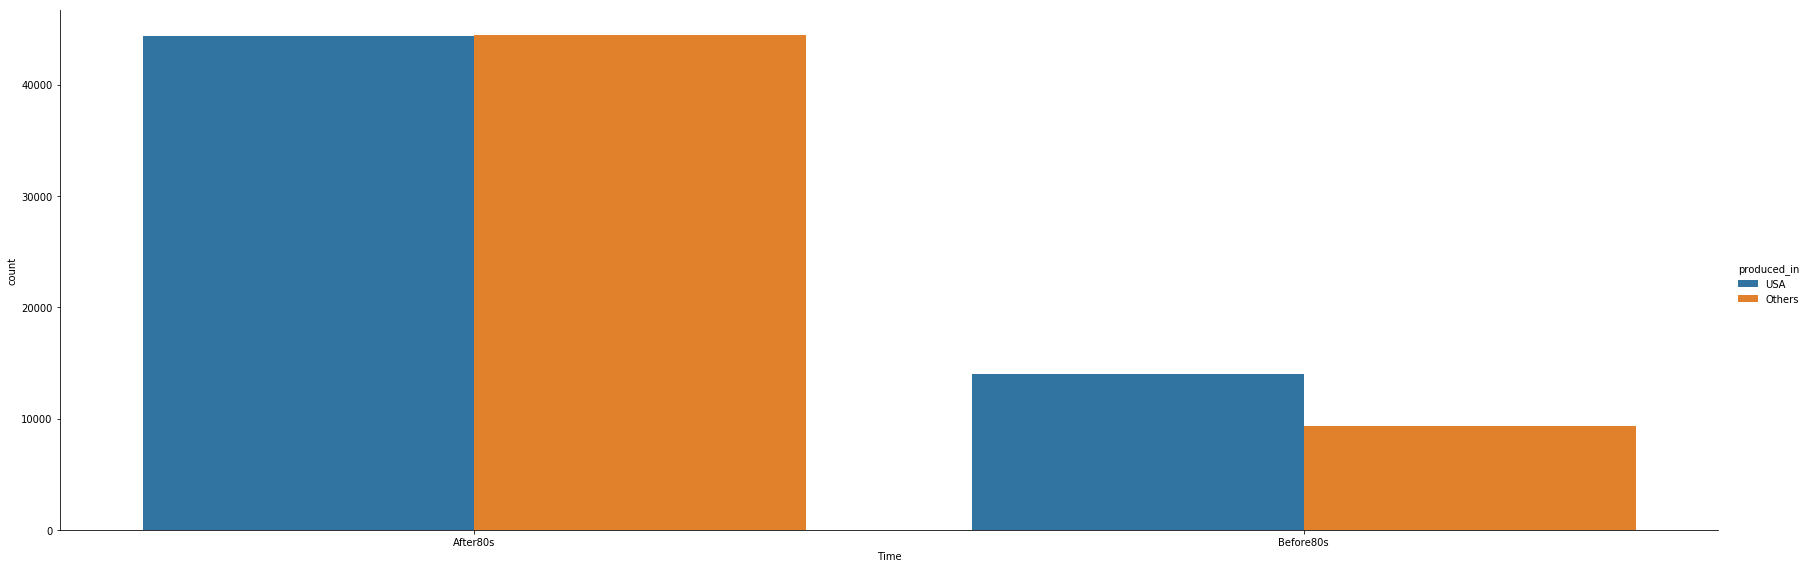